In [1]:
import os
root_proj = '/Users/luo/OneDrive/GitHub/Glacier-in-SETP'
os.chdir(root_proj)


In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import xarray as xr
import numpy as np

In [36]:
path_cm051_tm = 'data/CN05-Climate-Data/Monthly/CN05.1_Tm_1961_2021_monthly_025x025.nc'
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'


In [124]:
ds = xr.open_dataset(path_cm051_tm)
# ds



<xarray.Dataset>
Dimensions:    (time: 732, bnds: 2, lon: 283, lat: 163)
Coordinates:
  * time       (time) datetime64[ns] 1961-01-16 ... 2021-12-16
  * lon        (lon) float64 69.75 70.0 70.25 70.5 ... 139.5 139.8 140.0 140.2
  * lat        (lat) float64 14.75 15.0 15.25 15.5 ... 54.5 54.75 55.0 55.25
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tm         (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.4
    history:      Thu Mar 03 15:23:52 2022: cdo monmean CN05.1_Tm_1961_2021_d...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

### Subseting for the cn05 data

In [102]:
ds_subs = ds.sel(lat=slice(27, 32), lon=slice(91, 99), time=slice('2000-01-01','2021-12-31'))


### Full Data 

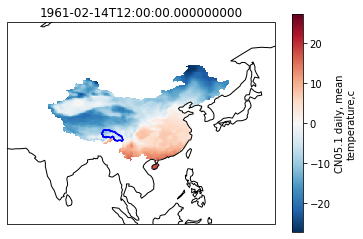

In [129]:
id_date = 1
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([60, 150, 0, 60])
ds['tm'][id_date].plot(x='lon',y='lat', ax=ax)
plt.title(ds['time'][id_date].values)
## 1. Tibeteau southeast boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=1)



### SETP region

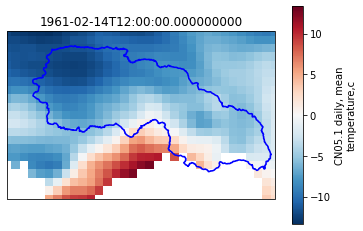

In [130]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([91, 99, 27, 32])   # setp region
ds_subs['tm'][1].plot(x='lon',y='lat', ax=ax)
plt.title(ds['time'][id_date].values)
## 1. Tibeteau southeast boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=1)


### Data mask by .shp file